## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Naive Submission 1](#section3)
4. [Machine learning Pipeline](#section4)
5. [Naive Submission 2](#section5)
6. [EDA and Data Preprocessing](#section6)
7. [Model Training](#section7)
8. [Model evaluation](#section8)<br>
    - 8.1 [Model Evaluation using accuracy score](#section501)<br>
    - 8.2 [Model Evaluation using confusion matrix](#section502)<br>
9. [Decision Tree with Gridsearch](#section9)<br>

### 1. Problem Statement
The goal is to predict the survival of passengers travelling in the Titanic using Machine learning.

### 2. Data Loading and Description


In [2]:

!unzip /content/drive/MyDrive/Mentoring/BDAIO/Session_DU/titanic.zip -d /content/datasets


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')

### 3. Naive Submission 1

Number of People Unsurvived and Survived


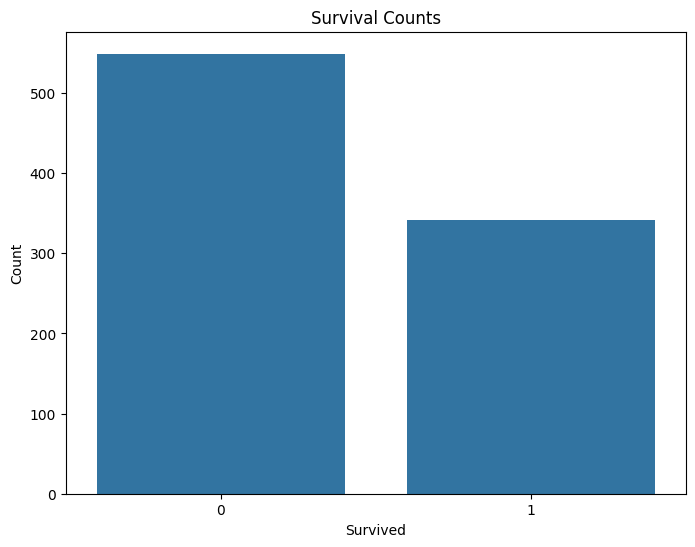

In [4]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='Survived', data=train)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Counts')
# Adding total count for each class at the top of each bar
plt.show()



In [5]:
submission = pd.read_csv('datasets/gender_submission.csv')
submission['Survived'] = 0
submission.to_csv('First_submission.csv', index=False)



### 4. Naive Submission 2

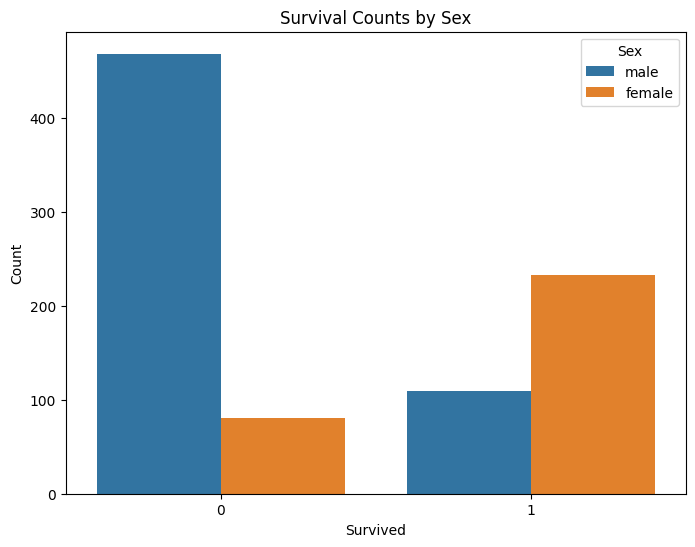

In [6]:

plt.figure(figsize=(8,6))
sns.countplot(x='Survived', hue='Sex', data=train)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Counts by Sex')
# Adding total count for each class at the top of each bar
plt.show()

In [7]:
submission_2 = test[['PassengerId']]
submission_2['Survived'] = (test['Sex'] == 'female').astype(int)
submission_2



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [8]:
submission_2.to_csv('Second_submission.csv', index=False)

### 4. Machine learning Pipeline

![Pipeline Diagram](images/pipeline.png)



### 6. EDA and Data Preprocessing

Missing Value Analysis

In [9]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Using Heatmap to identify the intensity of Null values in a column

<Axes: >

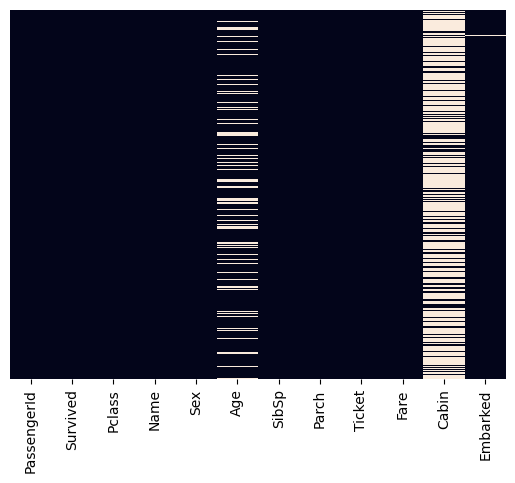

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)


- Dealing with missing values<br/>
    - Replacing missing entries of __Embarked.__ with median
    - Dropping the column __'Age'__ and __'Cabin'__  as it has too many _null_ values.
    - Replacing 0 values of fare with median values.

In [11]:
# Imputing with mode
train.Embarked = train.Embarked.fillna(train['Embarked'].mode()[0])

In [12]:
# Dropping 'Age' and 'Cabin' columns from the train dataset as they have a high number of missing values
train = train.drop(['Age', 'Cabin'], axis=1)


In [13]:
# Replacing 0 to median for Fare
train['Fare']=train['Fare'].replace(0,train['Fare'].median())

Survival rate based on Passenger Class


<Axes: title={'center': 'Survival rate based on Passenger Class'}, xlabel='Pclass', ylabel='count'>

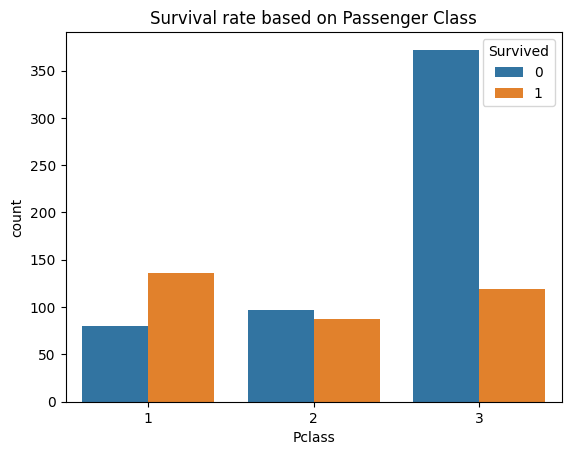

In [14]:
plt.title("Survival rate based on Passenger Class")
sns.countplot(x="Pclass",hue="Survived",data=train)


In [15]:
#TODO

# Write the code for Survival rate based on Passenger Embark

In [16]:
#TODO

# Write the code for Survival Rate of People having Siblings or Spouse


<Axes: title={'center': 'Survival Rate Pie Chart'}, ylabel='count'>

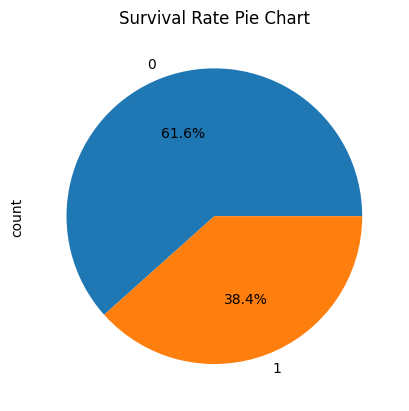

In [17]:
plt.title("Survival Rate Pie Chart")
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%')



In [18]:
#TODO
# Write the code to show the parcentage of male and female using pie chart

## Outlier Analysis

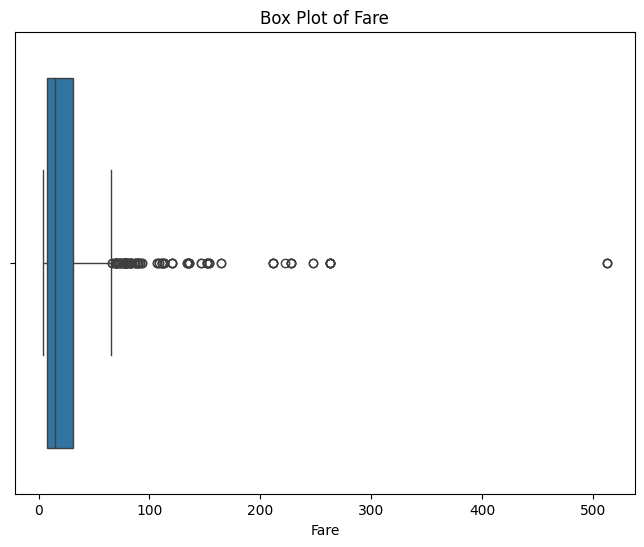

In [19]:

# HandsOnML.ipynb
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' DataFrame is already defined

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a box plot for the 'Fare' feature
sns.boxplot(x=train['Fare'])

# Set the title and labels
plt.title('Box Plot of Fare')
plt.xlabel('Fare')

# Show the plot
plt.show()

In [20]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [21]:
# Dropping the errelevant column
train = train.drop(['PassengerId', 'Name','Ticket'], axis = 1)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


# Encoding 

In [25]:
# HandsOnML.ipynb
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


# One hot encoding for 'Sex' and 'Embarked' features using sklearn
encoder = OneHotEncoder()  # No sparse parameter
encoded_data = encoder.fit_transform(train[['Sex', 'Embarked']]).toarray()  # Convert to dense array

# Drop the original 'Sex' and 'Embarked' columns
train = train.drop(['Sex', 'Embarked'], axis=1)

# Add the encoded data to the DataFrame and convert to int
encoded_columns = encoder.get_feature_names_out(['Sex', 'Embarked'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns).astype(int)  # Convert to int

# Join the encoded DataFrame with the original DataFrame
train = train.join(encoded_df)

# Display the first few rows of the updated DataFrame
train.head()

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1
3,1,1,1,0,53.1000,1,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,1


Establishing __coorelation__ between all the features using __heatmap__.

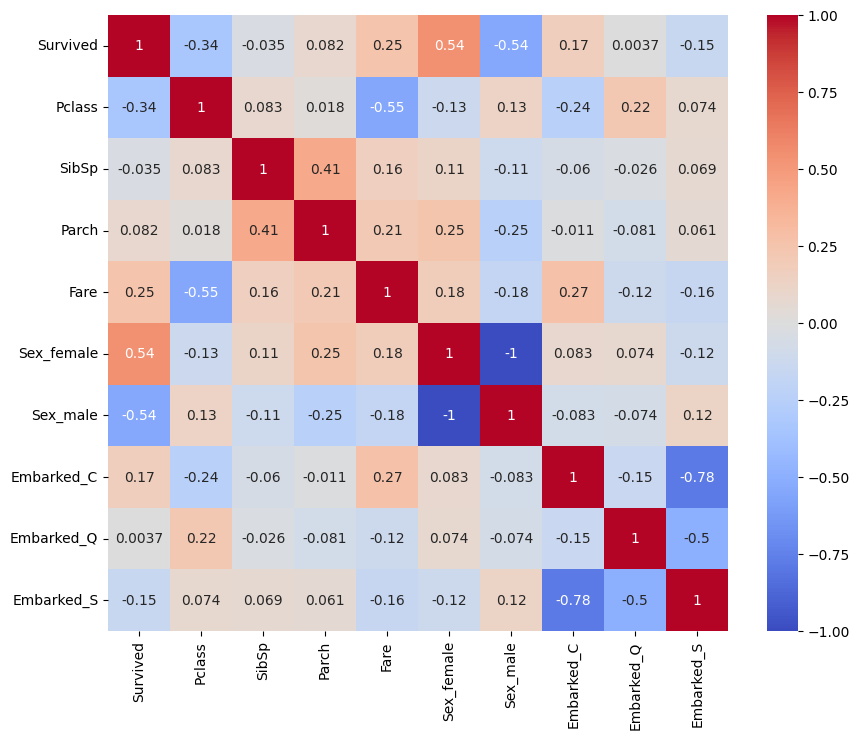

In [ ]:

# Generate correlation matrix
corr = train.corr()

# Set the figure size for the plot
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', vmax=1)

# Show the plot
plt.show()


### Using StandardScaler to Normalize the Data


In [ ]:
from sklearn.preprocessing import StandardScaler

StandardScaler_normalize = StandardScaler()
y = train['Survived']
X = StandardScaler_normalize.fit_transform(train.drop('Survived',axis=1))

### Train_Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7989
Confusion Matrix:
[[90 13]
 [23 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       103
           1       0.80      0.70      0.75        76

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# Understanding Confusion Metrics

![image.png](images\Confusion_metrics.png)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dtc = DecisionTreeClassifier()  # You can adjust parameters as needed

# Train the model
dtc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8324
Confusion Matrix:
[[93 10]
 [20 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       103
           1       0.85      0.74      0.79        76

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize the grid search
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Print the best score
print(f'Best score: {grid_search.best_score_:.4f}')

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Best parameters: {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20}
Best score: 0.8118
Accuracy: 0.8268
Confusion Matrix:
[[95  8]
 [23 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       103
           1       0.87      0.70      0.77        76

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



d:\Temp\Kaggle_Competition_on_Titanic\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2160 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Temp\Kaggle_Competition_on_Titanic\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Temp\Kaggle_Competition_on_Titanic\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\Temp\Kaggle_Competition_on_Titanic\.venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    v

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100)  # You can adjust n_estimators as needed

# Train the model
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8324
Confusion Matrix:
[[94  9]
 [21 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       103
           1       0.86      0.72      0.79        76

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.84      0.83      0.83       179



# XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8492
Confusion Matrix:
[[96  7]
 [20 56]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       103
           1       0.89      0.74      0.81        76

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



###  Generating the submission file

In [ ]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# Dropping 'Age' and 'Cabin' columns from the train dataset as they have a high number of missing values
test = test.drop(['Age', 'Cabin'], axis=1)

test.Fare = test.Fare.fillna(test['Fare'].median())

# Replacing 0 to median for Fare
test['Fare']=test['Fare'].replace(0,test['Fare'].median())

In [ ]:
# Dropping the errelevant column
test = test.drop(['PassengerId', 'Name','Ticket'], axis = 1)
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,0,0,7.8292,Q
1,3,female,1,0,7.0000,S
2,2,male,0,0,9.6875,Q
3,3,male,0,0,8.6625,S
4,3,female,1,1,12.2875,S


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


# One hot encoding for 'Sex' and 'Embarked' features using sklearn
encoder = OneHotEncoder()  # No sparse parameter
encoded_data = encoder.fit_transform(test[['Sex', 'Embarked']]).toarray()  # Convert to dense array

# Drop the original 'Sex' and 'Embarked' columns
test = test.drop(['Sex', 'Embarked'], axis=1)

# Add the encoded data to the DataFrame and convert to int
encoded_columns = encoder.get_feature_names_out(['Sex', 'Embarked'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns).astype(int)  # Convert to int

# Join the encoded DataFrame with the original DataFrame
test = test.join(encoded_df)

# Display the first few rows of the updated DataFrame
test.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,7.8292,0,1,0,1,0
1,3,1,0,7.0000,1,0,0,0,1
2,2,0,0,9.6875,0,1,0,1,0
3,3,0,0,8.6625,0,1,0,0,1
4,3,1,1,12.2875,1,0,0,0,1


In [ ]:
submission_3 = pd.read_csv("datasets/gender_submission.csv")
submission_3


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission_3['Survived'] = best_svm.predict(StandardScaler_normalize.transform(test))
submission_3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission_3.to_csv('Third_submission.csv', index=False)